# Introduction

Below are are examples of a few packages that are essential in building our models:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The aim of this project is to build different supervised learning models for the purpose of binary classification with a dataset of our choice. Afterwards, proceeding to compare the different models with a performance metric. The methods we decided to work with are Logisitic Regression with PCA, K Nearest Neighbour, boosted decision trees and a baseline model.

We chose to look into heart disease and the data collected when deciding whether or not someone is potentially at risk. Heart disease is one of the most prevalent chronic diseases in the UK and on average 460 people die each day in the UK from a heart or circulatory disease. Healthcare costs relating to heart and circulatory diseases are estimated at £9 billion each year. Due to it's seriousness and the number of lives impacted by it annually we felt this would be an interesting topic to investigate. The ability to detect early signs of heart disease can be the difference between life and death. For more information about heart disease, please visit https://www.bhf.org.uk/-/media/files/research/heart-statistics/bhf-cvd-statistics---uk-factsheet.pdf.

We found an appropriate <a href="{https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook/data}">{heart disease dataset}</a> that covered the main three criteria we were looking for. The first was that the target variable, whether or not someone is at risk of heart disease or an attack, was binary. The second was that there needed to be a minimum number of observations, which in this case was 441,456. Then the last one was to make sure there were enough relevant features to give us the ability to make accurate and reliable predictions. As this is an American dataset, the results may vary compared to the United Kingdom. For more information on the data below and what the values represent visit https://www.cdc.gov/brfss/annual_data/annual_2015.html?fbclid=IwAR0ek9MdZDMNTUFnlX6JGRPoVE1qAj6-5AFzdywFJ75TJH3m2Z4_hD31nn0.

In [2]:
hd_data = pd.read_csv('https://raw.githubusercontent.com/erinp0/DST-Assessment-1/main/Calvin%20Mcadam-Mubiru/Heart%20Disease%20Data/Original%20Heart%20Disease%20Data%20Sample.csv')
print('\033[1m' + "Sample of the 2015 BRFSS survey for heart disease:")
hd_data.head()

Sample of the 2015 BRFSS survey for heart disease:


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1,1,b'01292015',b'01',b'29',b'2015',1200,2015000001,2015000001,1,...,4,2,1,1,1,1,1,NaN,NaN,1.0
1,1,1,b'01202015',b'01',b'20',b'2015',1100,2015000002,2015000002,1,...,2,2,3,3,4,2,2,NaN,NaN,2.0
2,1,1,b'02012015',b'02',b'01',b'2015',1200,2015000003,2015000003,1,...,9,9,9,9,9,9,9,9.0,9.0,NaN
3,1,1,b'01142015',b'01',b'14',b'2015',1100,2015000004,2015000004,1,...,4,2,1,1,1,1,1,NaN,NaN,9.0
4,1,1,b'01142015',b'01',b'14',b'2015',1100,2015000005,2015000005,1,...,4,2,1,1,1,1,1,NaN,NaN,1.0


We proceeded to adjust some of the features below, so that the data could be cleaner. 'HeartDiseaseofAttack' is presented in 1's and 0's, where 1 is the risk of you experiencing heart disease and attack or isn't. High Cholesterol is 1 if you have it and 0 if not or you haven't checked in the past 5 years. For smoking, 1 if a person has smoked more than 100 cigarettes and 0 otherwise. For strokes, high blood pressure and physical activity are all in binary. Whether or not you eat fruit daily is binary, same as with vegetables. Diabetes is 0 for no, 1 for pre-diabetes or borederline and 2 is for yes. Access to a health plan and medical costs (if any) are binary. General health is on a 1 to 5 scale, 1 being excellent and 5 being poor. Bad mental health days and physical health are out of 30. Difficulty walking is binary and so is sex. Age is 1 if the case is between 18-24 up to 13 where the case is older than 80. This is in 5 year incements. Education is rated 1 to 6 where 1 is never went to school or only went to nursery and 6 being college for 4 years or more. Finally income where 1 means that your income is less than $10,000 up to 8 being $75,000 or more.

In [3]:
hd_data = pd.read_csv('https://raw.githubusercontent.com/erinp0/DST-Assessment-1/main/Calvin%20Mcadam-Mubiru/Heart%20Disease%20Data/Adjusted%20Heart%20Disease%20Dataset')
hd_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


Due to there being numerous missing values in multiple cases, we decided that instead of removing them completely, we would impute our data. When training a model, the more data the better, so it would be helpful to keep as many observations in our dataset as possible. Below is a sample of the dataset after imputating it:

In [4]:
hd_data = pd.read_csv('https://raw.githubusercontent.com/erinp0/DST-Assessment-1/main/Emelia%20Osborne/TrainingDataImputation.csv')
hd_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,0.5,1.0,0.27,0.5,0.5,0.333333,0.0,0.0,...,1.0,0.5,0.666667,0.032258,0.032258,1.0,0.0,1.000000,0.857143,0.000000
1,1.0,1.0,1.0,1.0,0.30,1.0,0.5,0.333333,0.5,1.0,...,1.0,0.5,1.000000,1.000000,1.000000,1.0,0.0,0.714286,0.857143,0.222222
2,1.0,1.0,1.0,1.0,0.27,1.0,0.5,0.333333,0.5,1.0,...,1.0,0.0,0.666667,0.032258,0.032258,0.5,1.0,1.000000,0.571429,0.555556
3,1.0,0.5,1.0,0.0,0.31,1.0,0.5,0.333333,0.5,0.5,...,1.0,0.5,0.666667,0.032258,0.000000,0.5,1.0,0.928571,0.428571,0.444444
4,1.0,1.0,1.0,1.0,0.28,1.0,1.0,0.333333,1.0,1.0,...,1.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,0.714286,0.714286,0.444444


### Exploratory Data Analysis

This gives us information about the dataset and the variables, and whether there are any null entries.

In [5]:
hd_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412514 entries, 0 to 412513
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  412514 non-null  float64
 1   HighBP                412514 non-null  float64
 2   HighChol              412514 non-null  float64
 3   CholCheck             412514 non-null  float64
 4   BMI                   412514 non-null  float64
 5   Smoker                412514 non-null  float64
 6   Stroke                412514 non-null  float64
 7   Diabetes              412514 non-null  float64
 8   PhysActivity          412514 non-null  float64
 9   Fruits                412514 non-null  float64
 10  Veggies               412514 non-null  float64
 11  HvyAlcoholConsump     412514 non-null  float64
 12  AnyHealthcare         412514 non-null  float64
 13  NoDocbcCost           412514 non-null  float64
 14  GenHlth               412514 non-null  float64
 15  

The describe function provides basic statistical details about our dataset. Only columns containing numerical values are displayed but luckily all of our features are numerical values already. The 'T' following the describe function transposes the output table.

In [6]:
hd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,412514.0,0.069411,0.254152,0.0,0.000000,0.000000,0.000000,1.0
HighBP,412514.0,0.695696,0.246903,0.0,0.500000,0.500000,1.000000,1.0
HighChol,412514.0,0.605806,0.336791,0.0,0.500000,0.500000,1.000000,1.0
CholCheck,412514.0,0.892970,0.243270,0.0,1.000000,1.000000,1.000000,1.0
BMI,412514.0,0.256821,0.100014,0.0,0.230000,0.260000,0.300000,1.0
Smoker,412514.0,0.686885,0.279861,0.0,0.500000,0.500000,1.000000,1.0
Stroke,412514.0,0.517856,0.098330,0.0,0.500000,0.500000,0.500000,1.0
Diabetes,412514.0,0.344209,0.087280,0.0,0.333333,0.333333,0.333333,1.0
PhysActivity,412514.0,0.794167,0.321738,0.0,0.500000,1.000000,1.000000,1.0
Fruits,412514.0,0.732088,0.333699,0.0,0.500000,1.000000,1.000000,1.0


Below shows the number of recorded observations of cases with heart disease or attack risk compared to ones without:

0.0    383881
1.0     28633
Name: HeartDiseaseorAttack, dtype: int64


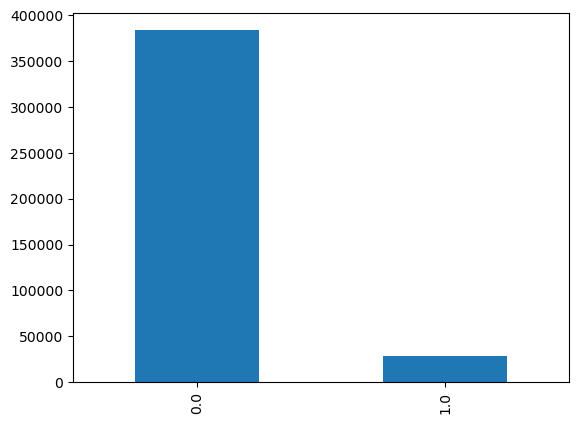

In [7]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = hd_data['HeartDiseaseorAttack'].map(lambda x: color_wheel.get(x + 1))
print(hd_data.HeartDiseaseorAttack.value_counts())
p=hd_data.HeartDiseaseorAttack.value_counts().plot(kind="bar")